## Instructions

1. Do not write your name on the assignment. Be careful about any warnings that might display some file path with your name included.

2. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity.

3. Write your code in the *Code* cells and print the instructed output. If you are instructed to explain something in words, write your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is coded and/or written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. This assignment is worth 100 points and is due on **April 21, 2025 at 11:59 pm**. 

6. **Five points given for properly formatting the assignment**. The breakdown is as follows:
- The submission must be an HTML file rendered using Quarto. (1 point).
- Your name should not be visible in the HTML file (including the file path in any warning that your code returns). (1 point)
- There are not excessively long outputs of extraneous information. (e.g. no printouts of entire data frames without good reason; there are not long printouts of which iteration a loop is on; there are not long sections of commented-out code, etc.) (1 point)
- Final answers for each question are written in Markdown cells. (1 point).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. (1 point)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

## 1) Bias-Variance Trade-off for Regression (33 points)

In this question, you will implement and visualize the bias-variance trade-off in a regression model by performing repetitive simulations.

The conceptual clarity about bias and variance will help with the main logic behind creating many models that will come up later in the course.

### a)

First, you need to implement the underlying function of the source you want to sample data from. Assume that the function is the [Bukin function](https://www.sfu.ca/~ssurjano/bukin6.html). Implement it as a user-defined function and run it with the test cases below to make sure it is implemented correctly.

**Note:** It would be more useful to only have one input for the function. You can treat the input as an array of two elements. You are not required to check for invalid inputs.

**(2 points)**

In [3]:
def Bukin(x):
    f_x = 100 * np.sqrt(np.abs(x[1] - 0.01*x[0]**2)) + 0.01*np.abs(x[0] + 10)
    return f_x

In [4]:
# Test cases
print(Bukin(np.array([1,2]))) # The output should be ~141.177
print(Bukin(np.array([6,-4]))) # The output should be ~208.966
print(Bukin(np.array([0,1]))) # The output should be 100.1

141.17735979665886
208.96613017821102
100.1


### b)

Using the following assumptions, sample a **test dataset** with 100 observations from the source:

- The first predictor, $x_1$, comes from a `uniform` distribution between -15 and -5. ($U[-15, -5]$)
- The second predictor, $x_2$, comes from a `uniform` distribution between -3 and 3. ($U[-3, 3]$)
- The relationship between the response and the two predictors is the Bukin function.
- Use `np.random.seed(100)` for reproducibility.

**Note:**

- **You are not allowed to use any loops/comprehensions for this part.**
- Make sure you remember how the test dataset should be sampled; it is not the same as the training dataset.

**(3 points)**

In [5]:
np.random.seed(100)
x1 = np.random.uniform(-15, -5, 100)
x2 = np.random.uniform(-3, 3, 100)
x = np.array([x1, x2]).T
y = np.apply_along_axis(Bukin, 1, x)

print(y[:5])

[ 86.87557781  43.05808206  70.34199879 125.54607969 102.49250025]


### c)

Create an empty DataFrame with columns named **degree**, **bias_sq** and **var**. This will be useful for storing the analysis results in the following parts of this question. **(1 point)**

In [6]:
df = pd.DataFrame(columns = ['degree', 'bias_sq', 'var'])

### d)

Sample **100 training datasets** and calculate the bias and the variance of a **linear regression** model that predicts for the test data coming from the underlying Bukin function (which you sampled in Part b). 

Repeat this process with polynomial transformations from degree 1 (which consists of the original predictors) to degree 7. For each degree, store the degree, bias-squared and variance values in the DataFrame you created in Part c.

**Note:**

- Assume that the noise in the source is a zero-mean Gaussian with a standard deviation of 10. ($N(0,10)$)
- Keep the training data size the same as the test data size.
- You need both the interactions and the higher-order transformations in your polynomial terms. Don't forget to exclude the bias. ("Bias" here refers to the object input. It simply means the intercept and has nothing to do with the bias this question calculates.)
- For the $i^{th}$ training dataset, you can consider using `np.random.seed(i)` for reproducibility.

**(20 points)**

In [7]:
from sklearn.preprocessing import PolynomialFeatures

for degree in range(1, 8):
    poly = PolynomialFeatures(degree = degree)
    x_test_poly = poly.fit_transform(x)
    preds = []

    # sample 100 training datasets, fit model on each and predict
    for i in range(100):
        np.random.seed(i)
        x1 = np.random.uniform(-15, -5, 100)
        x2 = np.random.uniform(-3, 3, 100)
        x_train = np.array([x1, x2]).T
        y_train = np.apply_along_axis(Bukin, 1, x_train) + np.random.normal(0, 10, 100)
        x_train_poly = poly.fit_transform(x_train)

        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        preds.append(model.predict(x_test_poly))
    
    y_pred_mean = np.mean(preds, axis = 0)
    bias_sq = bias_sq = np.mean((np.mean(preds, axis=0) - y) ** 2)
    var = np.mean(np.var(preds, axis = 0))
    df = pd.concat([df, pd.DataFrame({'degree': [degree], 'bias_sq': [bias_sq], 'var': [var]})], ignore_index=True)

print(df.head(7))


  degree      bias_sq          var
0      1  1389.973230    48.303003
1      2   500.324096    49.320800
2      3   247.736876    51.090469
3      4   232.114927   112.769786
4      5   103.325092   110.923058
5      6   185.169632   396.304313
6      7   132.632243  1253.393239


### e)

Using the results stored in the DataFrame, plot **the bias-squared, variance, and the total error** (y-axis) against the polynomial degree (x-axis). Your plot should look similar to the plot created in the lecture. Use three lineplots and put all the lineplots on the same figure. Add a legend.

**(5 points)**

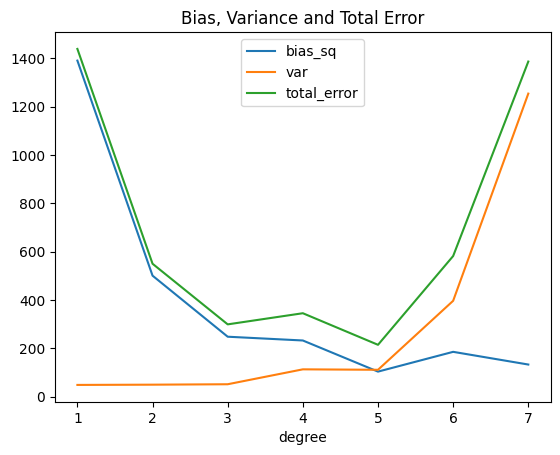

In [8]:
df["total_error"] = df["bias_sq"] + df["var"]

df.plot(x = "degree", y = ["bias_sq", "var", "total_error"])
plt.title("Bias, Variance and Total Error")
plt.show()

### f)

What is the degree of the model that performs the best? **(1 point)** What are the bias-squared, variance and total error values at that degree? **(1 point)**

The model performs best at degree 5.

In [9]:
print("Bias squared at degree 5:", df.loc[df["degree"] == 5, "bias_sq"])
print("Total error at degree 5:", df.loc[df["degree"] == 5, "total_error"])
print("Variance at degree 5:", df.loc[df["degree"] == 5, "var"])

Bias squared at degree 5: 4    103.325092
Name: bias_sq, dtype: float64
Total error at degree 5: 4    214.248149
Name: total_error, dtype: float64
Variance at degree 5: 4    110.923058
Name: var, dtype: float64


## 2) Low-Bias-Low-Variance Model via Regularization (26 points)

In this question, you will further reduce the total error by regularization. In other words, you will implement the low-bias-low-variance model by tuning a regularized regression model.

### a)

First of all, explain why it is not guaranteed for the best-performing model in Question 1 to be the low-bias-low-variance model. **(2 points)** Why would regularization be necessary to achieve that model? **(2 points)**

The best-performing model in Q1 isn't guaranteed to be the low-bias low-variance model because it could be overfitting the 100 training datasets. Especially since the variance of degree 5 is higher than those of other lower degrees, the model at degree 5 may be memorizing the training data, including the noise. Regularization is thus necessary to reduce the complexity of the model, avoid potentially overfitting noise, and to shrink coefficients.

### b)

Before repeating the process in Question 1, you should see from the figure created in Part 1e and the numeric results used in Part 1f that there is no point in trying some degrees again with regularization. Find those degrees and explain why you should not use them for this question, **using your knowledge on how regularization affects the bias and the variance of a model.** **(4 points)**

The degrees that there is no point trying again with regularization are 1, 2, and 3 because they already have high bias and regularization only increase bias further, in exchange for a slight reduction in variance.

### c)

Repeat Parts 1c and 1d with ridge regularization. **Exclude the degrees you found in 2b and also degree 7**. Use leave-one-out cross-validation (LOOCV) to tune the model hyperparameter and use `neg_root_mean_squared_error` as the scoring metric. **(7 points)**

**Note:**

- You are expected be familiar with which model object and which inputs to use from last quarter.
- Note that LOOCV is the default setting of the object you are supposed to use. Scikit-learn optimized its implementation very well, so **you should leave the cv input as default to avoid any runtime issues**.
- Use `np.logspace(-1, -3, 100)` as the hyperparameter array.
- Keep in mind that there is a preprocessing step that is always necessary before using the model you are supposed to use.

**(10 points)**

In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

df_ridge = pd.DataFrame(columns = ['degree', 'bias_sq', 'var', 'total_error'])
alphas = np.logspace(-1,-3,100)

# generate test data
np.random.seed(100)
x1 = np.random.uniform(-15, -5, 100)
x2 = np.random.uniform(-3, 3, 100)
x = np.array([x1, x2]).T
y = np.apply_along_axis(Bukin, 1, x)

for degree in range(4, 7):
    poly = PolynomialFeatures(degree = degree)
    x_test_poly = poly.fit_transform(x)

    scaler = StandardScaler()
    x_test_poly_scaled = scaler.fit_transform(x_test_poly)
    
    preds = []

    # sample 100 training datasets
    for i in range(100):
        np.random.seed(i)
        x1 = np.random.uniform(-15, -5, 100)
        x2 = np.random.uniform(-3, 3, 100)
        x_train = np.array([x1, x2]).T
        y_train = np.apply_along_axis(Bukin, 1, x_train) + np.random.normal(0, 10, 100)
        
        x_train_poly = poly.fit_transform(x_train)
        x_train_poly_scaled = scaler.fit_transform(x_train_poly)

        ridge_model = RidgeCV(alphas = alphas)
        ridge_model.fit(x_train_poly_scaled, y_train)
        preds.append(ridge_model.predict(x_test_poly_scaled))
    
    y_pred_mean = np.mean(preds, axis = 0)
    bias_sq = np.mean((np.mean(preds, axis=0) - y) ** 2)
    var = np.mean(np.var(preds, axis = 0))
    total_error = bias_sq + var

    df_ridge = pd.concat([df_ridge, pd.DataFrame({'degree': [degree], 'bias_sq': [bias_sq], 'var': [var], 'total_error': [total_error]})], ignore_index=True)

print(df_ridge.head(7))
    

  degree     bias_sq         var  total_error
0      4  229.526762   91.771235   321.297996
1      5  153.009821   99.475024   252.484845
2      6  157.746766  122.921457   280.668223


### d)

Repeat Part 1e with ridge regularization, using the results from Part 2c. **(1 point)**

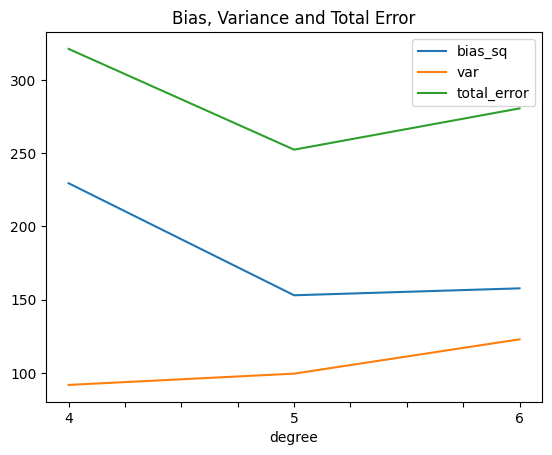

In [11]:
df_ridge.plot(x = "degree", y = ["bias_sq", "var", "total_error"])
plt.title("Bias, Variance and Total Error")
plt.show()

### e)

What is the degree of the ridge regression model that performs the best? **(1 point)** What are the bias-squared, variance and total error values at that degree? **(1 point)** How do these three values compare to the three values of the best-performing linear regression model (from Part 1f)? **(2 points)**

The best peforming ridge model is at degre 5.

In [12]:
print("Bias squared at degree 5:", df_ridge.loc[df_ridge["degree"] == 5, "bias_sq"])
print("Total error at degree 5:", df_ridge.loc[df_ridge["degree"] == 5, "total_error"])
print("Variance at degree 5:", df_ridge.loc[df_ridge["degree"] == 5, "var"])

Bias squared at degree 5: 1    153.009821
Name: bias_sq, dtype: float64
Total error at degree 5: 1    252.484845
Name: total_error, dtype: float64
Variance at degree 5: 1    99.475024
Name: var, dtype: float64


In [13]:
print("Total error for model without regularization at degree 5:", df.loc[df["degree"] == 5, "total_error"])
print("bias squared for model without regularization at degree 5:", df.loc[df["degree"] == 5, "bias_sq"])
print("Variance for model without regularization at degree 5:", df.loc[df["degree"] == 5, "var"])

Total error for model without regularization at degree 5: 4    214.248149
Name: total_error, dtype: float64
bias squared for model without regularization at degree 5: 4    103.325092
Name: bias_sq, dtype: float64
Variance for model without regularization at degree 5: 4    110.923058
Name: var, dtype: float64


Regularization decreased variance from 110.92 to 99.47 but increased bias from 103.32 to 153. Therefore, total error increased by 46.

### f)

Is the regularization (and tuning) successful in reducing the total error of the regression model? **(1 point)** Justify your answer and explain why this is the case, using the results from Part 2e and your knowledge on how bias and variance change with regularization. **(4 points)**

Regularization and tuning weren't successful in reducing the total error of rhe regression model because they increased the bias too much and decreased the variance by too little. This occurred because regularization oversimplified the model at degree 5, causing it to become overly simple and therefore underfitting the data.

## 3) Bias-Variance Trade-off for Classification (36 points)

In this question, you will implement and visualize the bias-variance trade-off in a classification model. As covered in class, **the error calculations for classification are different than regression**, so it is necessary to perform the bias-variance analysis for classification as well.

First of all, you need to visualize the underlying boundary between the classes in the population. Run the given code that implements the following:

- 2000 test observations are sampled from a population with two predictors.
- Each predictor is uniformly distributed between -15 and 15. ($U[-15, 15]$)
- The underlying boundary between the classes is a circle with radius 10.
- The noise in the population represents a 30% chance that the observation is misclassified.

In [14]:
# Number of observations
n = 2000

np.random.seed(111)

# Test predictors
x1 = np.random.uniform(-15, 15, n)
x2 = np.random.uniform(-15, 15, n)
X_test = pd.DataFrame({'x1': x1, 'x2': x2})

# Underlying boundary
boundary = (x1**2) + (x2**2)

# Test response (no noise!)
y_test_wo_noise = (boundary < 100).astype(int)

# Test response with noise (Only for comparison -- NOT TO BE USED FOR THE ANALYSIS)
noise_prob = 0.3
num_noisy_obs = int(noise_prob*n)

y_test_w_noise = y_test_wo_noise.copy()
noise_indices = np.random.choice(range(len(y_test_w_noise)), num_noisy_obs, replace = False)
y_test_w_noise[noise_indices] = 1 - y_test_wo_noise[noise_indices]

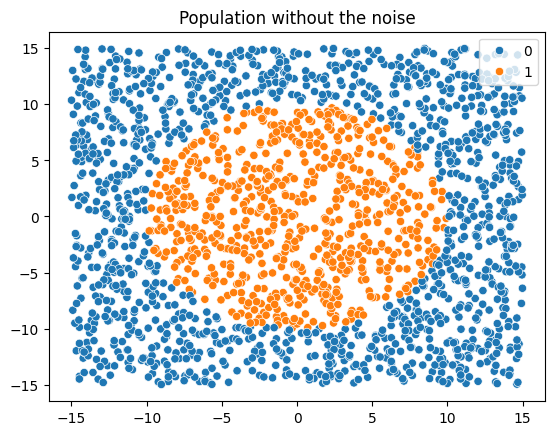

In [15]:
sns.scatterplot(x = x1, y = x2, hue=y_test_wo_noise)
plt.title('Population without the noise')
plt.show()

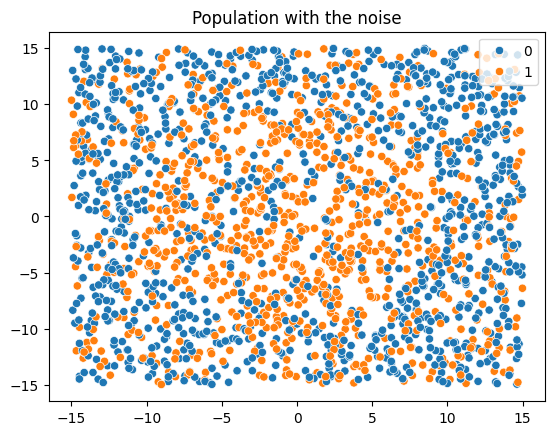

In [16]:
sns.scatterplot(x = x1, y = x2, hue=y_test_w_noise)
plt.title('Population with the noise')
plt.show()

### a)

Create an empty DataFrame with columns named **K**, **bias**, **var** and **noise**. This will be useful to store the analysis results in the following parts of this question. **(1 point)**

In [17]:
q3_df = pd.DataFrame(columns = ['K', 'bias', 'var', "noise"])

### b)

Sample **100 training datasets** and calculate the bias and the variance of a K-Nearest Neighbors (KNN) classifier that predicts for the test data coming from the source with the circular underlying boundary (which is sampled in  the given code).

Repeat this process with a number of neighbors (K value) **from 10 to 150, with a stepsize of 10**. For each number of neighbors (K), store the K, bias, variance and noise values in the DataFrame you created in Part a. 

**Note:**

- Keep the training data size the same as the test data size.
- The given code above should help you with both sampling the training data and adding noise to the training responses.
- For the $i^{th}$ training dataset, you can consider using `np.random.seed(i)` for reproducibility.
- The code for this part will take a while to run. To check the progress of your code while it runs, a simple but efficient method is to add a `print(K)` line in the loop.
- Keep the hyperparameters of the KNN Classifier other than K as default.
- You can assume a decision threshold of 0.5.
- Since the predictor values are in the same range and at the same order of magnitude, scaling is not required. Even though both scaled and unscaled data would return similar (not the same) results, **do NOT scale the data** for consistency in grading.

**(25 points)**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

for K in range(10, 160, 10):
    print(K)
    preds = []

    for i in range(100):
        np.random.seed(i)
        n = 2000
        x1_train = np.random.uniform(-15, 15, n)
        x2_train = np.random.uniform(-15, 15, n)
        X_train = pd.DataFrame({'x1': x1_train, 'x2': x2_train})

        # Underlying boundary
        boundary = (x1_train**2) + (x2_train**2)

        # Train response (no noise!)
        y_train_wo_noise = (boundary < 100).astype(int)

        noise_prob = 0.3
        num_noisy_obs = int(noise_prob*n)

        y_train_w_noise = y_train_wo_noise.copy()
        noise_indices = np.random.choice(range(len(y_train_w_noise)), num_noisy_obs, replace = False)
        y_train_w_noise[noise_indices] = 1 - y_train_wo_noise[noise_indices]


        knn_model = KNeighborsClassifier(n_neighbors = K)
        knn_model.fit(X_train, y_train_w_noise)

        y_pred = knn_model.predict(X_test)

        preds.append(y_pred)
    
    preds = np.array(preds)
    mode_pred = np.round(np.mean(preds, axis = 0))
    accuracies = np.mean(preds == y_test_w_noise, axis=1)    
    bias = np.mean(mode_pred != y_test_wo_noise)
    vars = [(mode_pred[i] != preds[:,i]).mean() for i in range(len(mode_pred))]
    variance = np.array(vars).mean()

    noise = noise_prob * (2*np.mean(accuracies) - 1)
    total_error = bias + variance + noise

    q3_df = pd.concat([q3_df, pd.DataFrame({'K': [K], 'bias': [bias], 'var': [variance], "noise": [noise]})], ignore_index=True)

print(q3_df)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
      K    bias       var     noise
0    10  0.0185  0.105175  0.093093
1    20  0.0115  0.061810  0.104514
2    30  0.0120  0.047995  0.107571
3    40  0.0110  0.043800  0.108822
4    50  0.0170  0.041865  0.109005
5    60  0.0145  0.041080  0.108810
6    70  0.0145  0.041225  0.108915
7    80  0.0150  0.040850  0.109098
8    90  0.0195  0.040530  0.108978
9   100  0.0225  0.040120  0.108972
10  110  0.0220  0.040155  0.108891
11  120  0.0225  0.040000  0.108840
12  130  0.0245  0.039885  0.108657
13  140  0.0260  0.040175  0.108627
14  150  0.0285  0.039995  0.108609


### c)

Using the results stored in the DataFrame, plot **the bias and the variance** (y-axis) against the K value (x-axis) **on one figure**, and **the total error** (y-axis) against the K value (x-axis) **on a separate figure**. Add a legend to the first figure.

**(5 points)**

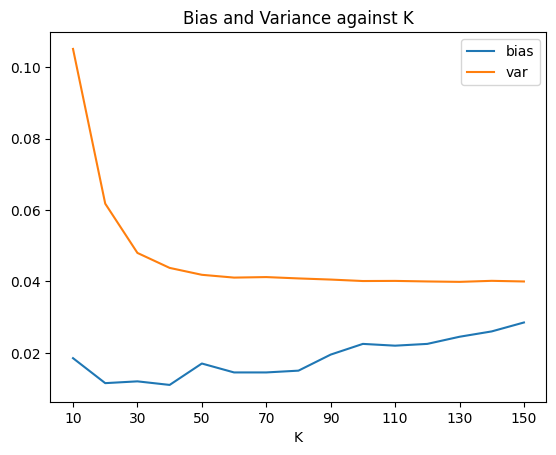

In [19]:
q3_df.plot(x = "K", y = ["bias", "var"])
plt.title("Bias and Variance against K")
plt.show()

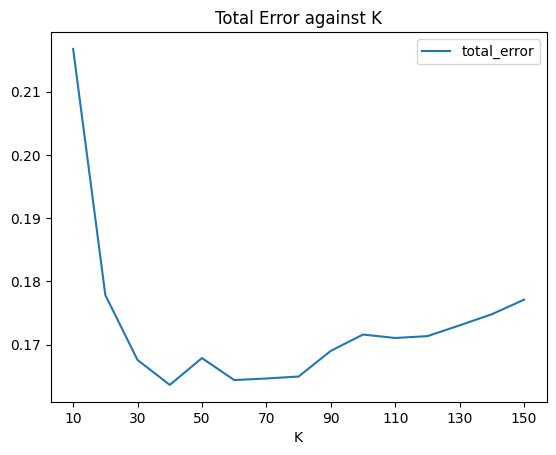

In [20]:
q3_df["total_error"] = q3_df["bias"] + q3_df["var"] + q3_df["noise"]

q3_df.plot(x = "K", y = ["total_error"])
plt.title("Total Error against K")
plt.show()

### d)

What is the K value of the model that performs the best? **(1 point)** What are the bias, variance and total error values for that K value? **(1 point)**

In [24]:
best_k_val = q3_df.loc[q3_df["total_error"] == q3_df["total_error"].min(), "K"].values[0]
print("Best K value:", best_k_val)

print("Bias for best K value:", q3_df.loc[q3_df["K"] == best_k_val, "bias"].values[0])
print("Variance for best K value:", q3_df.loc[q3_df["K"] == best_k_val, "var"].values[0])
print("Total Error for best K value:", q3_df.loc[q3_df["K"] == best_k_val, "total_error"].values[0])


Best K value: 40
Bias for best K value: 0.011
Variance for best K value: 0.0438
Total Error for best K value: 0.16362200000000002


### e) 

In part c, you should see the variance leveling off after a certain K value. Explain why this is the case, using your knowledge on how the K value affects the complexity of a KNN model. **(3 points)** 

Variance seems to level off after a K value of 50. Since higher K values represent less complex models, the classification of each data point is less impacted by one or a few noisy neighbors or outliers. Therefore, past K = 50, increasing the number of neighbors considered for each data point does not substantially reduce the impact of any one neighbor. As we've seen before, variance initially quickly drops as a model goes from highly complex to less complex, but it tends to level off as complexity continues to lessen.